# Çoklu Doğrusal Regresyon
* Veri örnekleri M+1 boyutlu bir hiper-düzlem denklemine, ihmal edilebilecek kadar küçük E hatası oranında uzaktır.
* Amaç, doğrusal regresyondaki gibi W ağırlık vektörünün tespit edilmesine dayanır.
* Hem basit doğrusal hem de çoklu doğrusal regresyonun en temel çözümü en küçük kareler yöntemine (least squares) dayanır.

 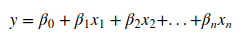

# En Küçük Kareler
* En küçük kareler yönteminin temel prensibi aşağıdaki gibi ifade edilen ortalama karesel hatanın (MSE) minimize edilmesidir.
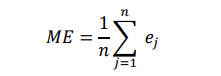

* Bu dersde çoklu regresyon modelini ele alacağız.

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split

* Veri setimizi içeri aktaralım.

In [3]:
df=pd.read_excel("../input/real-estate-valuation-dataset/Real estate valuation data set.xlsx")

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


* Veri setimizdeki sütunları türkçeye çevirelim.

In [5]:
df=df.rename(columns={"X1 transaction date":"İşlem Tarihi",
                  "X2 house age":"Ev Yaşı",
                  "X3 distance to the nearest MRT station":"Metroya Olan Uzaklık",
                  "X4 number of convenience stores":"Civardaki Market Sayısı",
                  "X5 latitude":"Enlem",
                  "X6 longitude":"Boylam",
                  "Y house price of unit area":"Birim Alan Fiyatı"})
df.head()

,No,İşlem Tarihi,Ev Yaşı,Metroya Olan Uzaklık,Civardaki Market Sayısı,Enlem,Boylam,Birim Alan Fiyatı
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


* Bağımlı ve bağımsız değişkenleri seçelim.

In [70]:
X = df.drop(['Birim Alan Fiyatı','İşlem Tarihi','No','Enlem','Boylam'],axis=1)#bağımsız değişkenler
y = df[["Birim Alan Fiyatı"]]#bağımlı değişken

* Veri setimizi eğitim ve test seti olmak üzere alt kümelere ayıralım.
* Eğitim Verisi (Training Data): Algoritmanın öğrenmesi için sunulan gözlemler dizisi. Algoritma bu veriye bakarak çıkarımlarda bulunur, kafasında model kurar.
* Test Verisi (Test Data): Algoritmanın kafasında şekillendirdiği modelin ne kadar gerçeğe yakın olduğunu test etmek için kullanılan veri seti.
* `test_size`:Elimizdeki veri setini eğitim ve test olarak ayırıken hangi oranda ayrılması gerektiğini açıklar.(Örn: (`test_size=0.2`) %80 train , %20 test olarak ayrılmış)
* `random_state`:Python veri setimizi `test_size` oranına göre her seferinde farklı yerlerinden böler.`random_state` parametresine değer atadığımız zaman bölme işlemi her seferinde bu değere göre belirlenir.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Model Kurma

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [91]:
model

LinearRegression()

### β0 ve β1 Katsayılarını Öğrenme

In [92]:
model.intercept_#β0

array([43.51488014])

In [93]:
model.coef_#β1

array([[-0.25840543, -0.00549834,  1.24734248]])

### Hatalar

In [76]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score

* MSE: Hata Kareler Ortalaması

In [77]:
MSE=mean_squared_error(y_test,lm.predict(X_test))
MSE

58.88825128983576

* RMSE: Hata Kareler Ortalamasının Karekökü

In [78]:
RMSE=np.sqrt(mean_squared_error(y_test,lm.predict(X_test)))
RMSE

7.673868078735506

### Cross Validation (Çapraz Doğrulama)
* Eğitim verisi alt kümelere ayrılır. Tek alt kümeyi eğitim için kullanıp diğer kalan kümeleri doğrulama işlemi için kullanılır.
* Bu işlem çapraz bir şekilde tüm alt kümeler için tekrarlanır.
* Bu işleme çapraz doğrulama denir. Bu işlem daha önceden belirlenen belli bir k sayısında yapılır.
* Veri eşit boydaki k parçaya ayrılır ve k kez değerlendirilir.

In [88]:
from sklearn.model_selection import cross_val_score

* cross_val_score(model,bağımsız değişken,bağımlı değişken,cv=çapraz doğrulama kat sayısı scoring=değerlendirme kriteri

In [105]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([ -94.67288183,  -65.49511044,  -73.37644307,  -95.87204478,
        -50.98276786,  -75.93310243,  -74.4899209 ,  -94.5179775 ,
        -66.92218882, -242.16450421])

* Yukarıdaki kod sonucunda eğitim seti üzerinden 10 farklı hata değeri hesaplandı.
* Bu hataları hesaplamak için eğitim seti 10 parçaya bölündü.
* Daha sonra parçalardan birisi test için seçilip geri kalanı eğitim için kullanıldı.
* Son olarak bu değerlerin ortalaması alındığında hata kareler ortalaması(mse) elde edilir.

In [106]:
#cv mse
np.mean(-cross_val_score(lm,X_train,y_train,cv=10,scoring="neg_mean_squared_error"))

93.442694184778

In [107]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(lm,X_train,y_train,cv=10,scoring="neg_mean_squared_error")))

9.66657613557034

* Yukarıda elde ettiğimiz mse ve rmse değerleri cross validation(çapraz doğrulama) yöntemini kullanmadan bulduğumuz değerlere göre daha doğru değerlerdir.
* Bunun nedeni ise veri seti içinden seçilebilecek farklı varyasyonlara ait hataları hesaplayabilmektir.

### R² Değeri
* Bağımlı değişkenin bağımsız değişknelerce hangi oranda açıklanabildiğini ifade eden değerdir.

In [99]:
r2_score(y_test, y_pred)

0.6489726933106555

# Kaynaklar
* https://www.emrealadag.com/makine-ogrenmesi-nedir.html
* https://bmb.cu.edu.tr/uorhan/DersNotu/Ders05.pdf